<a href="https://colab.research.google.com/github/owenc8/CV_Project_freshVSrotten/blob/test_2/CV_project_bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To-DO
#Convert Txt files to XML and run the code below
#train the data
# -
# -
# get code from: ComputerVisionProject.ipynb and
# YOLOv8_Tutorial.ipynb

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [4]:
test_dir = '/content/drive/MyDrive/LabFruit/Test'
train_dir = '/content/drive/MyDrive/LabFruit/Train'

In [ ]:
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/val')

In [5]:
label_dir= "/content/drive/MyDrive/LabFruit/Final_data/labels"
image_dir="/content/drive/MyDrive/LabFruit/Final_data/images"

In [ ]:
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

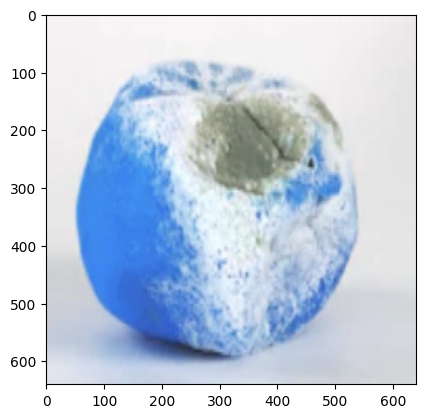

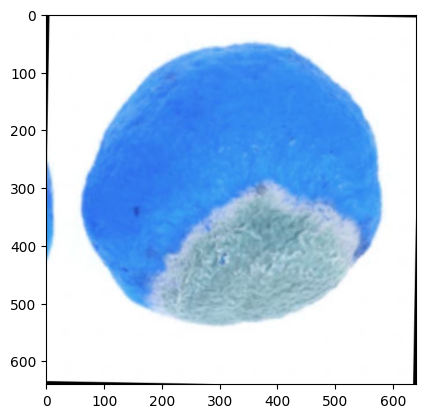

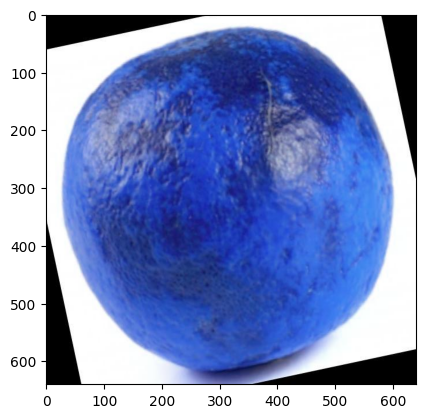

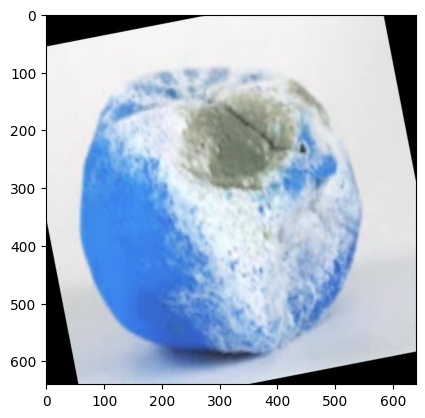

In [12]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [6]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'difficult' at 0x7f5cec9e5170>
<Element 'occluded' at 0x7f5cec9e7330>
<Element 'bndbox' at 0x7f5cec9e59e0>
<Element 'xmin' at 0x7f5cec9e5a80>
<Element 'xmax' at 0x7f5cec9e67a0>
<Element 'ymin' at 0x7f5cec9e4a40>
<Element 'ymax' at 0x7f5cec9e5530>
/content/drive/MyDrive/LabFruit/Final_data/labels/train/apple_5_jpg.rf.d0fcfdaaafa01ffd6d7fd65f4170c28c.xml
<Element 'annotation' at 0x7f5cecc5cb80>
<Element 'folder' at 0x7f5cecc5cea0>
<Element 'filename' at 0x7f5cecc5dd00>
<Element 'path' at 0x7f5cecc5dc60>
<Element 'source' at 0x7f5cecc5d080>
<Element 'database' at 0x7f5cecc5ccc0>
<Element 'size' at 0x7f5cecc5cae0>
<Element 'width' at 0x7f5cecc5c7c0>
<Element 'height' at 0x7f5cecc5d0d0>
<Element 'depth' at 0x7f5cecc5d7b0>
<Element 'segmented' at 0x7f5cecc5cef0>
<Element 'object' at 0x7f5cecc5d9e0>
<Element 'name' at 0x7f5d93359bc0>
<Element 'pose' at 0x7f5d93359530>
<Element 'truncated' at 0x7f5cec9e7060>
<Element 'difficult' at 0x

In [7]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [8]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Screen-Shot-2018-06-07-at-2-45-44-PM_png.rf.8e...,rotten_apple,640,640,46,11,576,576
1,Screen-Shot-2018-06-07-at-2-23-51-PM_png.rf.ec...,rotten_apple,640,640,61,35,594,620
2,Screen-Shot-2018-06-07-at-2-35-21-PM_png.rf.44...,rotten_apple,640,640,30,46,621,602
3,Screen-Shot-2018-06-07-at-2-46-22-PM_png.rf.3f...,rotten_apple,640,640,28,98,525,579
4,Screen-Shot-2018-06-07-at-3-05-46-PM_png.rf.65...,rotten_apple,640,640,79,59,563,609


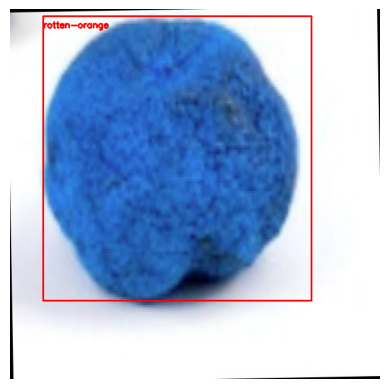

In [9]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name          label  width  \
10  Screen-Shot-2018-06-12-at-11-23-24-PM_png.rf.2...  rotten-orange    640   

    height  xmin  ymin  xmax  ymax  
10     640    57    12   521   504  


In [11]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    290 non-null    object
 1   label   290 non-null    object
 2   width   290 non-null    int64 
 3   height  290 non-null    int64 
 4   xmin    290 non-null    int64 
 5   ymin    290 non-null    int64 
 6   xmax    290 non-null    int64 
 7   ymax    290 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.2+ KB


In [12]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['rotten-orange' 'rotten-banana' 'rotten_apple' 'banana' 'orange' 'apple'
 'tomato' 'rotten_tomato']
['rotten_apple' 'rotten-orange' 'rotten-banana' 'apple' 'banana' 'orange'
 'tomato' 'rotten_tomato']


In [13]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'tomato': 6,
              'rotten_tomato' : 7}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [14]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [22]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,Screen-Shot-2018-06-12-at-11-24-12-PM_png.rf.b...,rotten-orange,640,640,46,82,537,581,5,0.455469,0.517969,0.767188,0.779687
1,Screen-Shot-2018-06-12-at-11-24-24-PM_png.rf.7...,rotten-orange,640,640,62,3,562,584,5,0.487500,0.458594,0.781250,0.907813
2,Screen-Shot-2018-06-12-at-11-23-29-PM_png.rf.d...,rotten-orange,640,640,50,28,604,624,5,0.510938,0.509375,0.865625,0.931250
3,Screen-Shot-2018-06-12-at-11-24-43-PM_png.rf.e...,rotten-orange,640,640,1,1,641,641,5,0.501563,0.501563,1.000000,1.000000
4,Screen-Shot-2018-06-12-at-11-25-11-PM_png.rf.d...,rotten-orange,640,640,1,1,641,641,5,0.501563,0.501563,1.000000,1.000000


In [15]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (3271, 13)
after deleting(train_data):  (3271, 13)
before deleting (val data):  (290, 13)
after deleting(val data):  (290, 13)


In [16]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [17]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

DETECTION WITH YOLO

In [18]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [19]:
from ultralytics import YOLO

In [20]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 89.0MB/s]


In [21]:
%%writefile config.yaml
path: /content/drive/MyDrive/LabFruit/Final_data
train: /content/drive/MyDrive/LabFruit/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/LabFruit/Final_data/images/val

# Classes
nc: 8 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: tomato
  7: rotten_tomato


  # label_map = { 'apple': 0,
  #           'rotten_apple': 1,
  #           'banana': 2,
  #             'rotten-banana':3,
  #             'orange': 4,
  #             'rotten-orange': 5,
  #             'tomato': 6,
  #             'rotten_tomato' : 7}

Writing config.yaml


In [22]:
#they said to look at yolo training docs before doing this
#https://docs.ultralytics.com/modes/train/


model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/train.cache... 2019 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2034/2034 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       2.2G      1.199       2.24      1.632          4        640: 100%|██████████| 255/255 [08:28<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]

                   all        202        290      0.418       0.51      0.495      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.22G      1.125      1.386      1.533          2        640: 100%|██████████| 255/255 [01:07<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.80it/s]

                   all        202        290      0.503      0.636      0.612      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.19G      1.084      1.233      1.482          7        640: 100%|██████████| 255/255 [01:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]

                   all        202        290      0.678      0.624      0.634      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.22G      1.011      1.107      1.448         15        640: 100%|██████████| 255/255 [01:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.54it/s]

                   all        202        290      0.643       0.77      0.724      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5       2.2G     0.9599     0.9262      1.383          7        640: 100%|██████████| 255/255 [01:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        202        290      0.721       0.81      0.796      0.569



5 epochs completed in 0.218 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]


                   all        202        290      0.722       0.81      0.795      0.568
                 apple         26         33      0.935      0.939       0.97      0.802
          rotten_apple         48         48      0.864      0.979      0.984      0.895
                banana         25         50      0.689       0.74      0.759      0.412
         rotten-banana         47         82       0.75      0.829      0.868      0.462
                orange         20         28      0.923      0.858       0.95      0.692
         rotten-orange         35         37      0.894      0.973      0.975      0.867
                tomato          6          6      0.242          1      0.522      0.242
         rotten_tomato          6          6      0.477      0.159      0.334      0.171
Speed: 0.4ms preprocess, 5.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5be811fa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [23]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.83it/s]


                   all        202        290      0.757      0.776      0.806      0.568
                 apple         26         33      0.968      0.922       0.97      0.802
          rotten_apple         48         48      0.869      0.969      0.984      0.895
                banana         25         50       0.78      0.638      0.759      0.411
         rotten-banana         47         82      0.834      0.738      0.868      0.459
                orange         20         28      0.958      0.806       0.95      0.692
         rotten-orange         35         37      0.909      0.973      0.975      0.873
                tomato          6          6      0.283          1      0.663      0.283
         rotten_tomato          6          6      0.456      0.167      0.279      0.127
Speed: 0.5ms preprocess, 11.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


0.7764824790092237

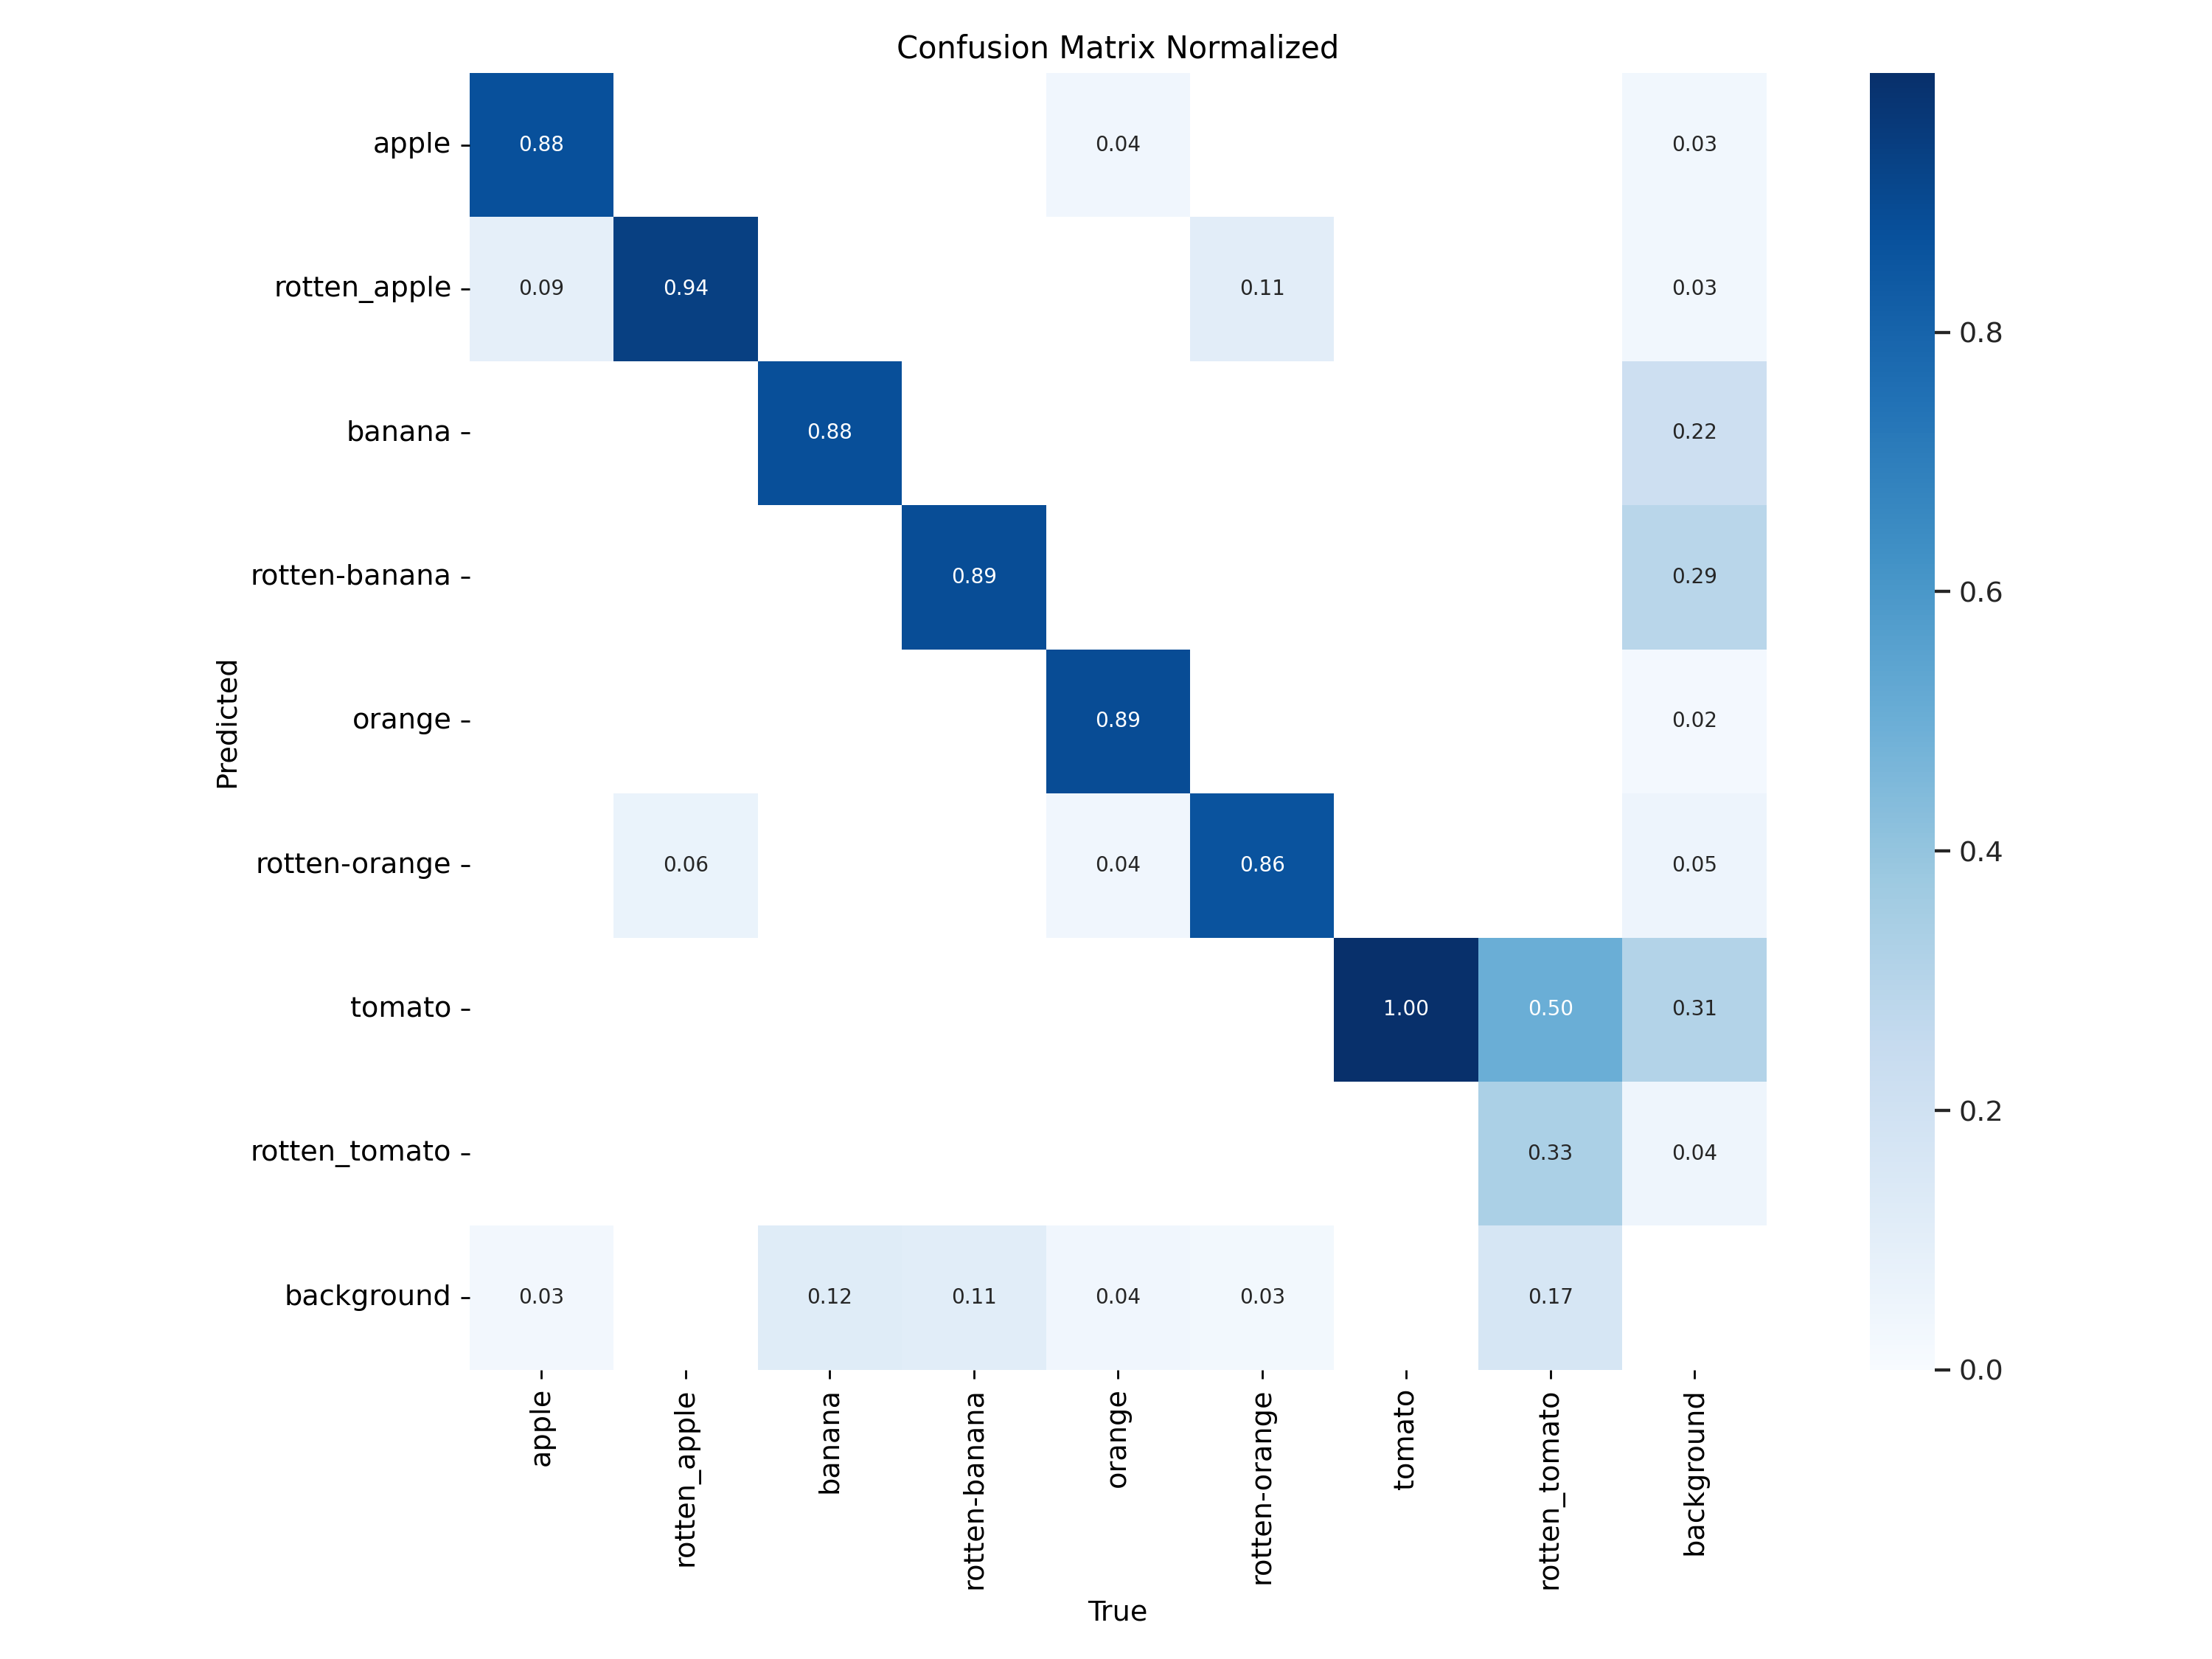

In [24]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')

PREDICTION

In [ ]:
model = YOLO(' )  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/freshpoint-produce-101-apples-bananas.jpg')